# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [ ]:
import pandas as pd

## imports for Python, Pandas

In [ ]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [211]:
# load json as string
sample_json_df= json.load((open('data/world_bank_projects_less.json')))

In [212]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [213]:
# load json as string
full_json_df=json.load((open('data/world_bank_projects.json')))

In [214]:
#reading the JSON file of the world bank projects into a dataframe
full_json_df = pd.read_json('data/world_bank_projects.json')
print(full_json_df.head())
print(full_json_df.shape)

                                    _id  approvalfy board_approval_month  \
0  {'$oid': '52b213b38594d8a2be17c780'}        1999             November   
1  {'$oid': '52b213b38594d8a2be17c781'}        2015             November   
2  {'$oid': '52b213b38594d8a2be17c782'}        2014             November   
3  {'$oid': '52b213b38594d8a2be17c783'}        2014              October   
4  {'$oid': '52b213b38594d8a2be17c784'}        2014              October   

      boardapprovaldate                                 borrower  \
0  2013-11-12T00:00:00Z  FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA   
1  2013-11-04T00:00:00Z                    GOVERNMENT OF TUNISIA   
2  2013-11-01T00:00:00Z   MINISTRY OF FINANCE AND ECONOMIC DEVEL   
3  2013-10-31T00:00:00Z   MIN. OF PLANNING AND INT'L COOPERATION   
4  2013-10-31T00:00:00Z                      MINISTRY OF FINANCE   

            closingdate                              country_namecode  \
0  2018-07-07T00:00:00Z  Federal Democratic Republic of Ethio

In [24]:
#unpacking the _id column from a dict into a single column to get unique IDs for project
unpackid = pd.DataFrame.from_records(full_json_df._id.values.tolist()).stack().reset_index()
unpackid['level_0'] = '_id'
unpackid.columns = ['columns','row','idvalue']

#appending the column of unqie ID values to the original DataFrame
full_json_df['idvalue']=unpackid['idvalue']

#listing top 10 countries by number of instances
countries = full_json_df.groupby('countryname')['idvalue'].nunique().sort_values(ascending=False)
print(countries.head(10))

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: idvalue, dtype: int64


In [28]:
#removed "Africa" as it was in the list and the problem requested top 10 countries.
Afrfilter = full_json_df['countryname'] != 'Africa'
less_africa = full_json_df[Afrfilter==True]
countrieslessafr = less_africa.groupby('countryname')['idvalue'].nunique().sort_values(ascending=False)
print(countrieslessafr.head(10))

countryname
Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Burkina Faso                        9
Name: idvalue, dtype: int64


In [122]:
#used normalize to get themes and names
from pandas.io.json import json_normalize
result = json_normalize(json.load((open('data/world_bank_projects.json'))), record_path='mjtheme_namecode')

In [123]:
print(result.head(10))

  code                                          name
0    8                             Human development
1   11                                              
2    1                           Economic management
3    6         Social protection and risk management
4    5                         Trade and integration
5    2                      Public sector governance
6   11  Environment and natural resources management
7    6         Social protection and risk management
8    7                   Social dev/gender/inclusion
9    7                   Social dev/gender/inclusion


In [118]:
# removed projects with no names - ran counts of top 10 projects
import numpy as np
result['name'].replace('', np.nan, inplace=True)
result['name'].value_counts().nlargest(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Name: name, dtype: int64

In [146]:
# again used normalize to get themes and names
import numpy as np
result_full = json_normalize(json.load((open('data/world_bank_projects.json'))), record_path='mjtheme_namecode')

In [194]:
#removing records with empty values
unique = result_full.drop_duplicates()
unique['name'].replace('', np.nan, inplace=True)
unique.dropna(subset=['name'], inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [195]:
print(unique)

    code                                          name
0      8                             Human development
2      1                           Economic management
3      6         Social protection and risk management
4      5                         Trade and integration
5      2                      Public sector governance
6     11  Environment and natural resources management
8      7                   Social dev/gender/inclusion
11     4      Financial and private sector development
18    10                             Rural development
53     9                             Urban development
252    3                                   Rule of law


In [196]:
unique=unique.set_index('code')

In [197]:
#create dict with key value pairs for the unique codes and names
unique = unique.to_dict('index')
unique = {int(k):v for k,v in unique.items()}

In [202]:
unique[11]['name']

'Environment and natural resources management'

In [204]:
#populate the code/name dataframe with the full name of the projects - comparing to unique dict
i=0
while i < len(result_full):
    if result_full['name'][i] == '':
        temp = int(result_full['code'][i])
        result_full['name'][i] = unique[temp]['name']
    i+=1

In [206]:
print(result_full.head())

  code                                          name
0    8                             Human development
1   11  Environment and natural resources management
2    1                           Economic management
3    6         Social protection and risk management
4    5                         Trade and integration


In [207]:
#Again, getting top 10 project themes - this time with a fully populated DataFrame
result_full['name'].value_counts().nlargest(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

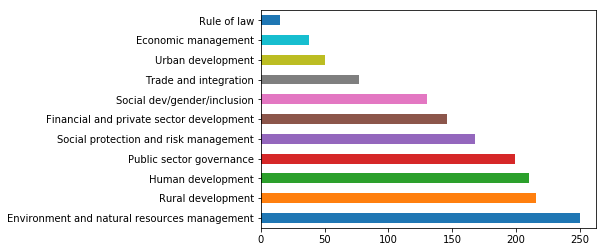

In [210]:
#ploting project themes based on number of occurances
import matplotlib.pyplot as plt
result_full['name'].value_counts()[:20].plot(kind='barh')
plt.show()